## Ajuste de modelo de regresión lineal:

Vamos a asumir que tenemos cuatro valores (pueden ser los valores medios o los de un paciente individual) de una variable, uno por cada revisión. Voy a tomar como ejemplo HFLCP para los sanos que hace una curva interesante

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

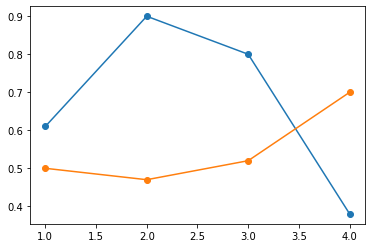

In [44]:
x_val_sanos = np.array([0.61, 0.9, 0.8, 0.38])
x_val_no_sanos = np.array([0.5, 0.47, 0.52, 0.7])
rev = np.array([1,2,3,4])
plt.plot(rev,x_val_sanos,'o-')
plt.plot(rev,x_val_no_sanos,'o-')

vamos a generar la función que obtiene el modelo de regresión lineal. El modelo que planteamos es:

$$y = a + bx + cx^2$$

donde la x corresponde al número de revisión

In [56]:
from sklearn.linear_model import LinearRegression

def lin_reg_model(rev,x_val):
    """
    Función que ajusta un modelo de regresión lineal para el conjunto de datos que viene dado por rev y x_val. Vamos a usar
    sklearn, pero podríamos utilizar cualquier otro módulo de algebra lineal
    """
    
    #generamos la matrix X, que tiene que contener en una columna rev y en otra rev**2
    
    rev_2 = rev**2
    
    X = np.vstack((np.ones(rev.shape),rev,rev_2)).T
    
    #ajustamos el modelo de regresion lineal
    
    #le digo false, para que me devuelva todo los coeficientes en coef_
    clf = LinearRegression(fit_intercept=False) #yo creo que lo que haría, para que fuesen todos comparables sería 
    # normalizar los datos pero no lo tengo claro, lo tendría que pensar
    
    
    clf.fit(X,x_val)
    
    #devolvemos los coeficientes
    return clf.coef_

In [57]:
coef_sanos = lin_reg_model(rev,x_val_sanos)
coef_no_sanos = lin_reg_model(rev,x_val_no_sanos)

print(coef_sanos)
print(coef_no_sanos)

[-0.0175  0.8085 -0.1775]
[ 0.6475 -0.1975  0.0525]


(20, 3)
(20,)


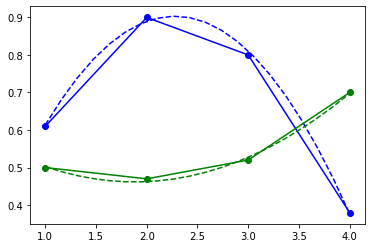

In [59]:
#vamos a comprobar el ajuste

xx = np.linspace(1,4,20)

XX = np.vstack((np.ones(xx.shape),xx,xx**2)).T

print(XX.shape)
y_reg_sanos = XX.dot(coef_sanos)
y_reg_no_sanos = XX.dot(coef_no_sanos)

print(y_reg.shape)

plt.plot(rev,x_val_sanos,'bo-',label = 'real values')
plt.plot(xx,y_reg_sanos,'b--',label = 'regression model')
plt.plot(rev,x_val_no_sanos,'go-',label = 'real values')
plt.plot(xx,y_reg_no_sanos,'g--',label = 'regression model')